In [ ]:
!pip install visualkeras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import visualkeras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPool2D, Dropout
# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

     |████████████████████████████████| 798kB 5.3MB/s 


4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (10000, 28, 28, 1))

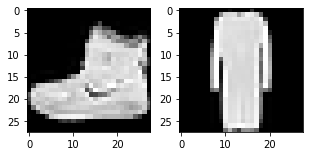

In [ ]:
from keras.datasets import fashion_mnist
(features_train,labels_train), (features_test, labels_test) = fashion_mnist.load_data()
i = 0
plt.figure(figsize=(5, 5))
plt.subplot(221), plt.imshow(features_train[i], cmap='gray')

plt.subplot(222), plt.imshow(features_train[i+25], cmap='gray')

features_train, features_test = features_train.reshape(60000, 28, 28, 1), features_test.reshape(10000,28,28,1)

features_train.shape, features_test.shape

In [ ]:
from sklearn.model_selection import train_test_split

There are 10 different classes of images, as following:

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot.
Image dimmensions are 28x28.

In [ ]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes_u5 = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat']
classes_o5 = ['Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
def image_augmentation(matrix, skew_degree, x_zoom, y_zoom):

    X_transformed = list()
    
    for row in matrix:
        row_transformed = apply_affine_transform(row, shear=20, zx=1.5, zy=1.5)

        X_transformed.append(row_transformed)
        
    return X_transformed

In [ ]:
X_transformed = image_augmentation(features_train, 20, 1.5, 1.5)    
len(X_transformed)
X_transformed = np.array(X_transformed)
X_transformed.shape

(60000, 28, 28, 1)

(120000, 28, 28, 1)

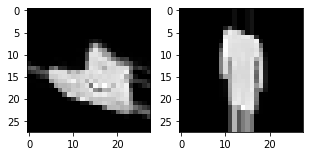

In [ ]:
i = 0
plt.figure(figsize=(5, 5))
plt.subplot(221), plt.imshow(X_transformed[i,:,:,0], cmap='gray')
plt.subplot(222), plt.imshow(X_transformed[i+25,:,:,0], cmap='gray')
features_train = np.concatenate([features_train, X_transformed], axis=0)
features_train.shape

In [ ]:
features_train.shape
labels_train = np.array(labels_train)
labels_train = np.concatenate([labels_train, labels_train], axis=0)

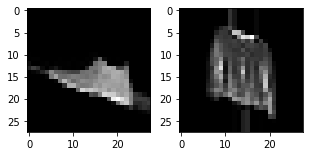

In [ ]:
X_test_transformed = image_augmentation(features_test, 20, 1.5, 1.5)    
len(X_test_transformed)
X_test_transformed = np.array(X_test_transformed)
X_test_transformed.shape
i = 0
plt.figure(figsize=(5, 5))
plt.subplot(221), plt.imshow(X_test_transformed[i,:,:,0], cmap='gray')
plt.subplot(222), plt.imshow(X_test_transformed[i+25,:,:,0], cmap='gray')
features_test = np.concatenate([features_test, X_test_transformed], axis=0)
features_test.shape
labels_test = np.array(labels_test)
labels_test = np.concatenate([labels_test, labels_test], axis=0)


In [ ]:
features_train.shape

(120000, 28, 28, 1)

In [ ]:
u5_features_train = []
u5_labels_train = []
o5_features_train = []
o5_labels_train = []
u5_features_test = []
u5_labels_test = []
o5_features_test = []
o5_labels_test = []
for i in range(len(labels_train)):
    if labels_train[i] < 5 :
        u5_features_train.append(features_train[i] / 255)
        u5_labels_train.append(labels_train[i])
    else:
        o5_features_train.append(features_train[i] / 255)
        o5_labels_train.append(labels_train[i])
        
for i in range(len(labels_test)):
    if labels_test[i] < 5 :
        u5_features_test.append(features_test[i] / 255)
        u5_labels_test.append(labels_test[i])
    else:
        o5_features_test.append(features_test[i] / 255)
        o5_labels_test.append(labels_test[i])
for i in range(len(o5_labels_train)):
  o5_labels_train[i] = o5_labels_train[i] -5
for i in range(len(o5_labels_test)):
  o5_labels_test[i] = o5_labels_test[i] - 5 

In [ ]:
o5_labels_train = np_utils.to_categorical(np.asarray(o5_labels_train)).astype(np.int32)
o5_labels_test = np_utils.to_categorical(np.asarray(o5_labels_test)).astype(np.int32)
u5_labels_train = np_utils.to_categorical(np.asarray(u5_labels_train)).astype(np.int32)
u5_labels_test = np_utils.to_categorical(np.asarray(u5_labels_test)).astype(np.int32)
o5_features_train = np.array(o5_features_train).astype(np.float32)
o5_features_test = np.array(o5_features_test).astype(np.float32)
u5_features_train = np.array(u5_features_train).astype(np.float32)

u5_features_test = np.array(u5_features_test).astype(np.float32)

In [ ]:
o5_labels_train.shape

(60000, 5)

                                                  CREATE CNN MODEL & VISUALIZE

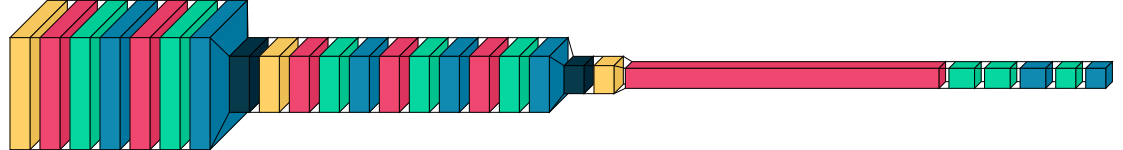

In [ ]:
from tensorflow.python.keras.layers import Input , Dense , Conv2D , Activation , Add,ReLU,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.python.keras.models import Model
input = Input(shape=[28, 28, 1])

x = Conv2D(32, (5, 5), strides=1, padding='same')(input)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform')(x)
x = Activation('relu')(x)

x = Conv2D(32, (5, 5), strides=1, padding='same')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform')(x)
x = Activation('relu')(x)

x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
x = Dropout (0.35)(x)

x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform')(x)
x = Activation('relu')(x)

x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform')(x)
x = Activation('relu')(x)

x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform')(x)
x = Activation('relu')(x)

x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
x = Dropout (0.35)(x)

x = Flatten()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(5)(x)
x = Activation('softmax')(x)

model = Model(inputs = input, outputs =x)


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop
import os 

# optimizer = RMSprop(lr=0.0001, rho=0.95, epsilon=1e-08, decay=0.0)
# epochs = 1
Learning_rate = 0.001
#decay= 5 * Learning_rate / epochs
optimizer = Adam(lr=Learning_rate)
#optimizer = Adam(lr=Learning_rate, decay= 3 * Learning_rate / epochs)
# optimizer = RMSprop(lr=Learning_rate, rho=0.9, epsilon=1e-08, decay= 0)


model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#               loss='sparse_categorical_crossentropy',

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000000000000000000000000000000000000000005)
# batch_size = 64
batch_size = 64
# Max value lr_min = 0.000125
checkpoint_path = "/content/drive/MyDrive/"
checkpoint_dir = os.path.dirname(checkpoint_path)
# checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

# model.load_weights("training_1/cp.ckpt") 
# # Optimizer
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# # Compiling the model
# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()

In [ ]:
def appendHist(h1, h2):
    if h1 == {}:
        return h2
    else:
        dest = {}
        for key, value in h1.items():
            dest[key] = value + h2[key]
        return dest

In [ ]:
Y = np.array([np.where(r==1)[0][0] for r in u5_labels_train])

In [ ]:
 model = tf.keras.models.load_model("/content/drive/MyDrive/u5")

In [ ]:
history = model.fit(x=u5_features_train, y = Y, epochs = 20, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= u5_features_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
model.save("content/drive/Mydrive/u5/second_shaved_model5.pb") # saving the model

np.save('/content/drive/MyDrive/u5/second_history5.npy',history5.history)

HISTORY 1+2

In [ ]:
history1 = np.load("/content/drive/MyDrive/u5/second_history1.npy",allow_pickle=True).item()
history2 = np.load("/content/drive/MyDrive/u5/second_history2.npy",allow_pickle=True).item()
history1_2 =  appendHist (history1, history2)
np.save('/content/drive/MyDrive/u5/second_history1_2.npy',history1_2)
history1_2 = np.load("/content/drive/MyDrive/u5/second_history1_2.npy",allow_pickle=True).item()

HISTORY 1+2+3

In [ ]:
# history1_2 = np.load("/content/drive/MyDrive/u5/second_history1_2.npy",allow_pickle=True).item()
# history3 = np.load("/content/drive/MyDrive/u5/second_history3.npy",allow_pickle=True).item()
# history1_2_3 = appendHist(history1_2, history3)
np.save('/content/drive/MyDrive/u5/second_history1_2_3.npy',history1_2_3)
history1_2_3 = np.load("/content/drive/MyDrive/u5/second_history1_2_3.npy",allow_pickle=True).item()

ΗΙSTORY 1+..+4

In [ ]:
# history1_2_3 = np.load("/content/drive/MyDrive/u5/second_history1_2_3.npy",allow_pickle=True).item()
# history4 = np.load("/content/drive/MyDrive/u5/second_history4.npy",allow_pickle=True).item()
# history1_4 = appendHist(history1_2_3, history4)
# np.save('/content/drive/MyDrive/u5/second_history1_2_3.npy',history1_4)
history1_4 = np.load("/content/drive/MyDrive/u5/second_history1_2_3.npy",allow_pickle=True).item()

HISTORY 1..5

In [ ]:
history1_4 = np.load("/content/drive/MyDrive/u5/second_history1_2_3.npy",allow_pickle=True).item()
history5 = np.load("/content/drive/MyDrive/u5/second_history5.npy",allow_pickle=True).item()
history1_5 = appendHist(history1_4, history5)
np.save('/content/drive/MyDrive/u5/second_history1_5.npy',history1_5)
history1_5 = np.load("/content/drive/MyDrive/u5/second_history1_5.npy",allow_pickle=True).item()

Visualizations

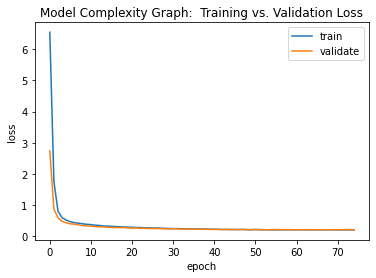

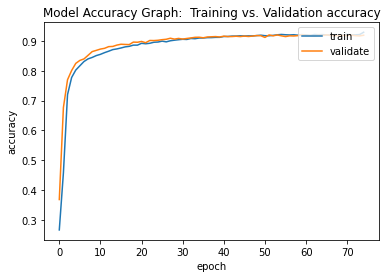

In [ ]:

plt.figure(1)
plt.plot(history1_5['loss'])
plt.plot(history1_5['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1_5['accuracy'])
plt.plot(history1_5['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

Evaluate with test data 

In [ ]:
test0 = np.array([np.where(r==1)[0][0] for r in u5_labels_test])
print(test0)

[2 1 1 ... 1 1 1]


In [ ]:
score = model.evaluate(u5_features_test, test0, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

157/157 [==============================] - 2s 13ms/step - loss: 0.1882 - accuracy: 0.9310
Test loss: 0.18824219703674316
Test accuracy: 0.9309999942779541


Confusion Matrix

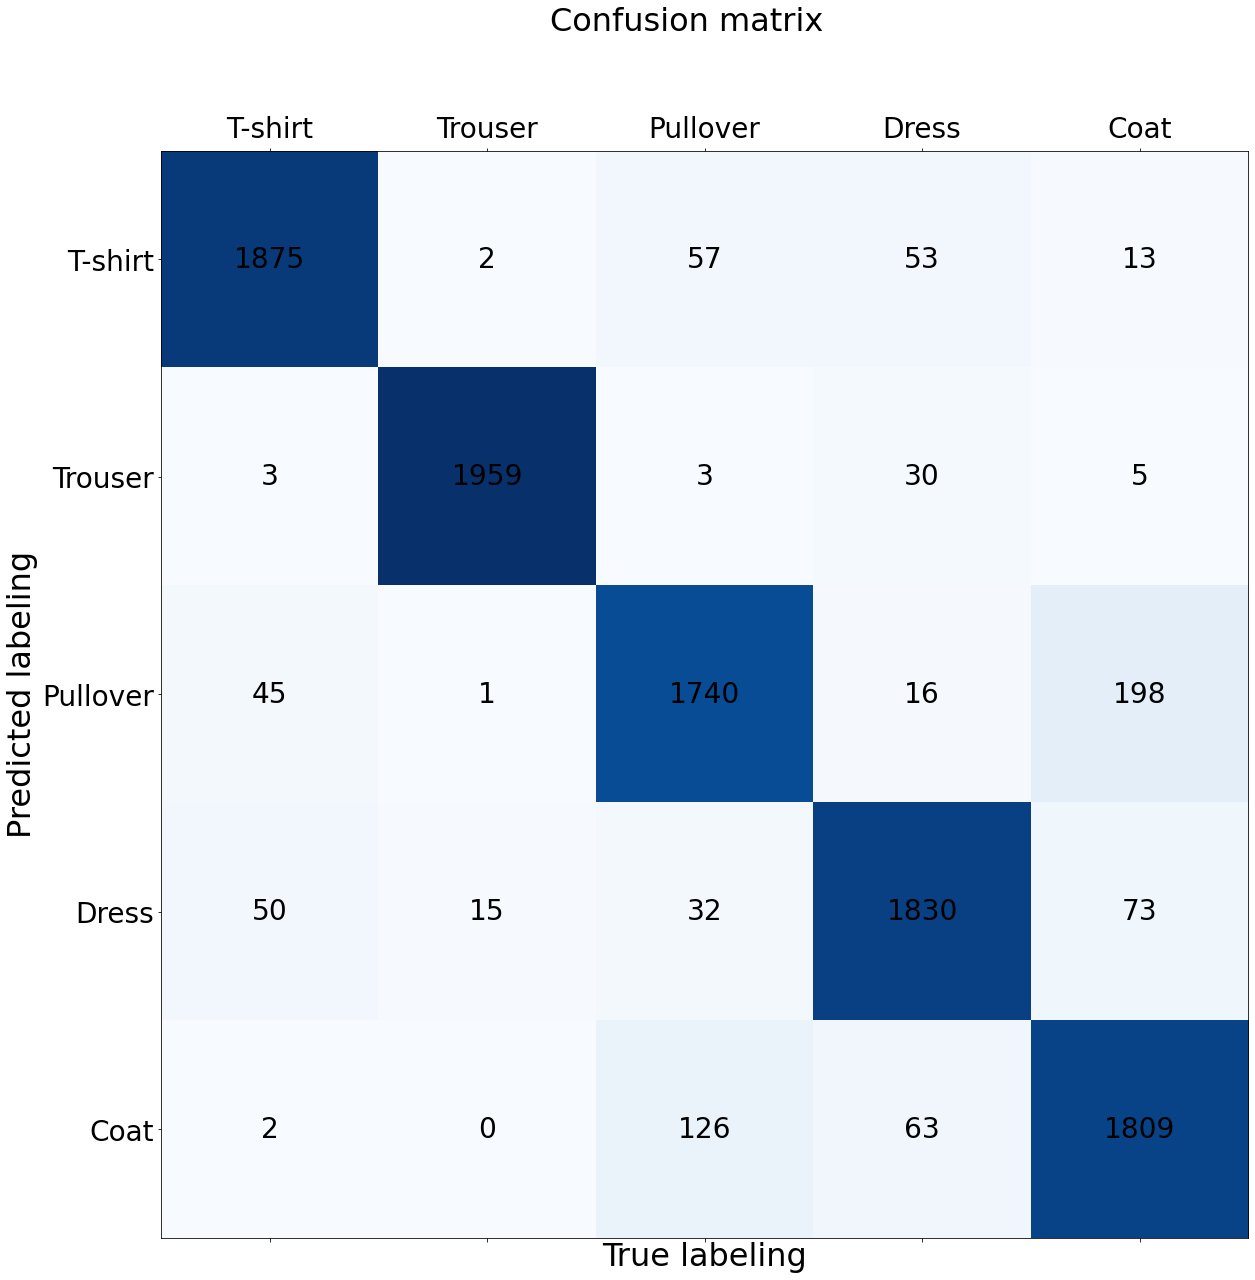

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/u5")
from sklearn.metrics import confusion_matrix

y_vecs = model.predict(u5_features_test)
y_pred = np.argmax(y_vecs, axis=1)
y_true = test0
cm = confusion_matrix(test0, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes_u5); ax.yaxis.set_ticklabels(classes_u5);

for i in range(5):
    for j in range(5):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(5))
plt.yticks(range(5))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

Transfer learning to other 5 labels

In [ ]:
model.save("/content/drive/MyDrive/o5")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/o5/assets


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/u5")
for layer in model.layers[:20]:
    layer.trainable =False
    
for layer in model.layers:
    print(layer.trainable)
    

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


In [ ]:
Y1 = np.array([np.where(r==1)[0][0] for r in o5_labels_train])
print(Y1)
print(o5_labels_train)

[4 2 0 ... 3 0 0]
[[0 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/u5")

In [ ]:
history1_2 = model.fit(x=o5_features_train, y = Y1, epochs = 60, validation_split = 0.10, shuffle = True,
                      batch_size = batch_size, verbose = 1, steps_per_epoch= o5_features_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
# model.save("content/drive/Mydrive/o5/shaved_model5.pb") # saving the model

# np.save('/content/drive/MyDrive/o5/history5.npy',history5.history)

Epoch 1/60
937/937 [==============================] - 95s 100ms/step - loss: 0.5560 - accuracy: 0.8387 - val_loss: 0.1246 - val_accuracy: 0.9543
INFO:tensorflow:Assets written to: /content/drive/MyDrive/o5/assets
Epoch 2/60
937/937 [==============================] - 91s 97ms/step - loss: 0.1492 - accuracy: 0.9482 - val_loss: 0.1253 - val_accuracy: 0.9560
INFO:tensorflow:Assets written to: /content/drive/MyDrive/o5/assets
Epoch 3/60
937/937 [==============================] - 92s 98ms/step - loss: 0.1113 - accuracy: 0.9597 - val_loss: 0.1109 - val_accuracy: 0.9620
INFO:tensorflow:Assets written to: /content/drive/MyDrive/o5/assets
Epoch 4/60
937/937 [==============================] - 99s 106ms/step - loss: 0.1016 - accuracy: 0.9634 - val_loss: 0.1000 - val_accuracy: 0.9650
INFO:tensorflow:Assets written to: /content/drive/MyDrive/o5/assets
Epoch 5/60
937/937 [==============================] - 102s 109ms/step - loss: 0.0955 - accuracy: 0.9661 - val_loss: 0.1014 - val_accuracy: 0.9657
INFO

In [ ]:
model.save("content/drive/Mydrive/o5/shaved_model5.pb") # saving the model

np.save('/content/drive/MyDrive/o5/2history1_2.npy',history1_2.history)

History 1+2

In [ ]:
history1 = np.load("/content/drive/MyDrive/o5/history1.npy",allow_pickle=True).item()
history2 = np.load("/content/drive/MyDrive/o5/history2.npy",allow_pickle=True).item()
history1_2 =  appendHist (history1, history2)
np.save('/content/drive/MyDrive/o5/history1_2.npy',history1_2)
history1_2 = np.load("/content/drive/MyDrive/o5/history1_2.npy",allow_pickle=True).item()

History 1+2+3

In [ ]:
history1_2 = np.load("/content/drive/MyDrive/o5/history1_2.npy",allow_pickle=True).item()
history3 = np.load("/content/drive/MyDrive/o5/history3.npy",allow_pickle=True).item()
history1_3 = appendHist (history1_2, history3)
np.save('/content/drive/MyDrive/o5/history1_3.npy',history1_3)
history1_3 = np.load("/content/drive/MyDrive/o5/history1_3.npy",allow_pickle=True).item()

History 1+2+3+4

In [ ]:
history1_3 = np.load("/content/drive/MyDrive/o5/history1_3.npy",allow_pickle=True).item()
history4 = np.load("/content/drive/MyDrive/o5/history4.npy",allow_pickle=True).item()
history1_4 = appendHist (history1_3, history4)
np.save('/content/drive/MyDrive/o5/history1_4.npy',history1_4)
history1_4 = np.load("/content/drive/MyDrive/o5/history1_4.npy",allow_pickle=True).item()

History 1...5

In [ ]:
history1_4 = np.load("/content/drive/MyDrive/o5/history1_4.npy",allow_pickle=True).item()
history5 = np.load("/content/drive/MyDrive/o5/history5.npy",allow_pickle=True).item()
history1_5 = appendHist (history1_4, history5)
np.save('/content/drive/MyDrive/o5/history1_5.npy',history1_4)
history1_5 = np.load("/content/drive/MyDrive/o5/history1_.npy",allow_pickle=True).item()

Visualizations

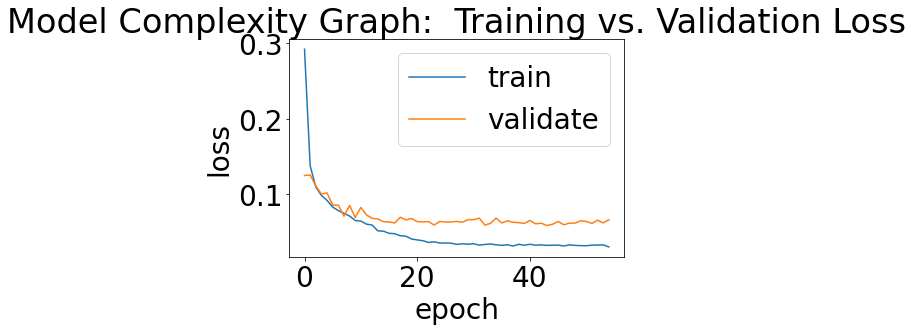

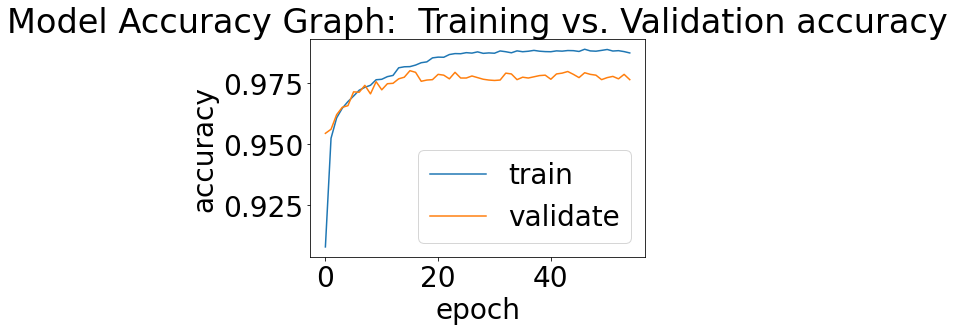

In [ ]:
history1_2 = np.load("/content/drive/MyDrive/o5/2history1_2.npy",allow_pickle=True).item()
plt.figure(1)
plt.plot(history1_2['loss'])
plt.plot(history1_2['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1_2['accuracy'])
plt.plot(history1_2['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

Evaluate with test data

In [ ]:
test1 = np.array([np.where(r==1)[0][0] for r in o5_labels_test])
print(test1)

[4 1 1 ... 4 3 0]


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/o5")
score = model.evaluate(o5_features_test, test1, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0591 - accuracy: 0.9804
Test loss: 0.05914219841361046
Test accuracy: 0.980400025844574


Confusion Matrix

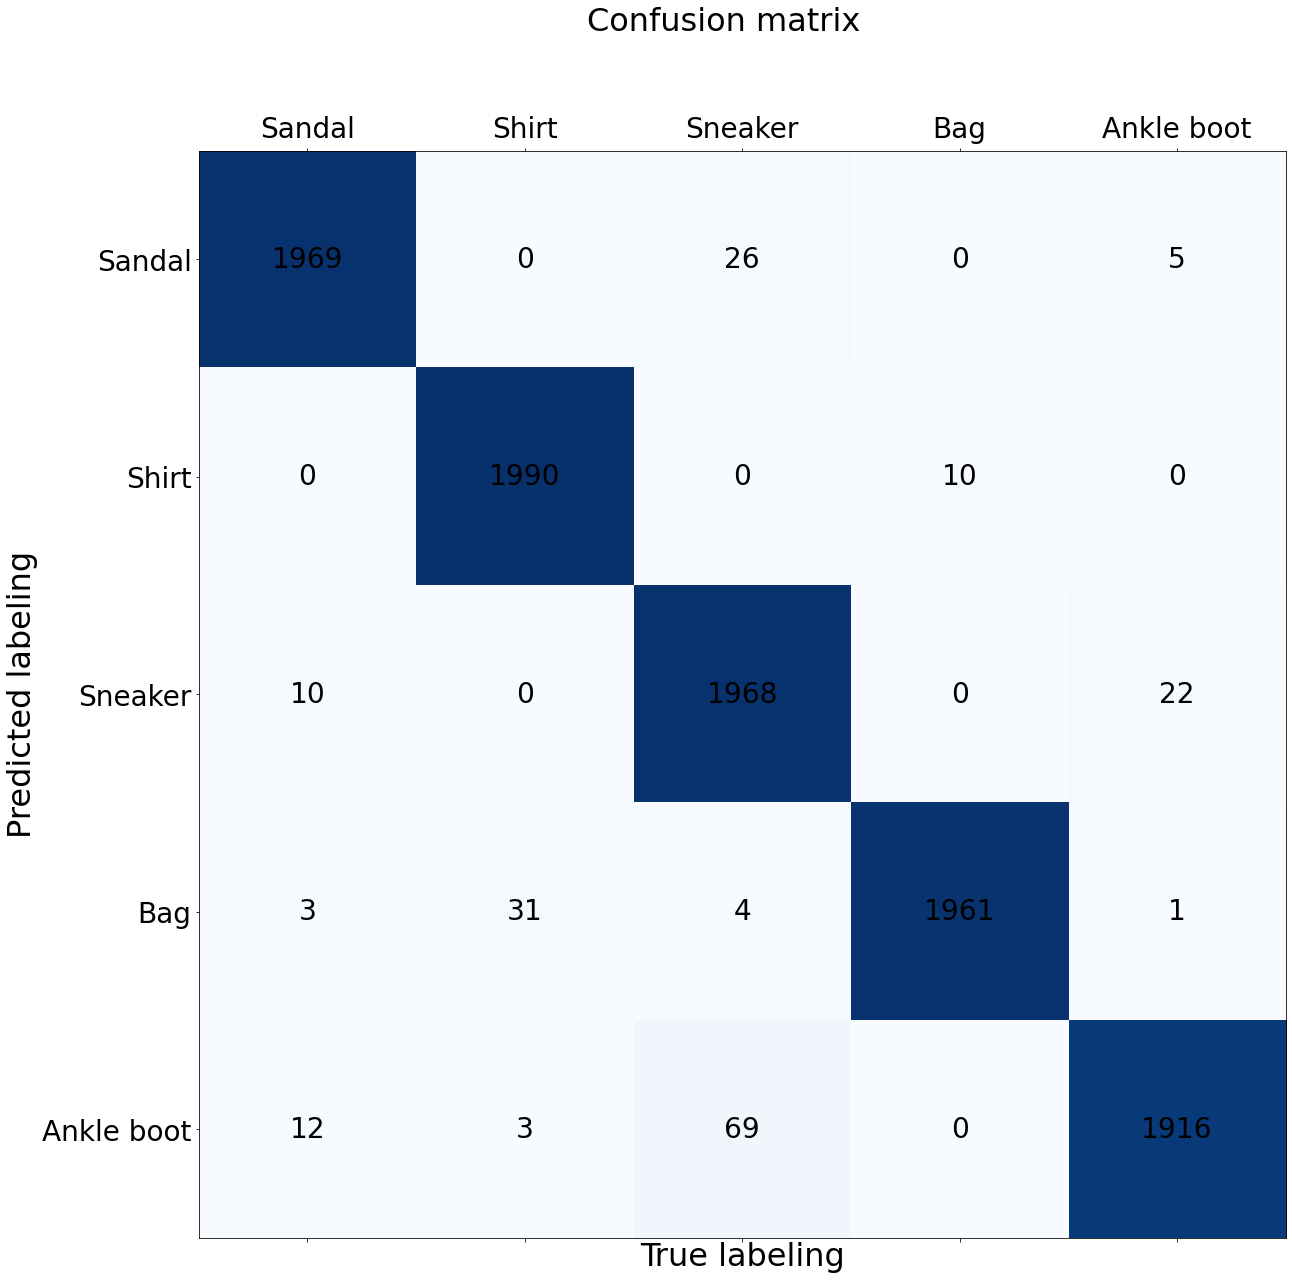

In [ ]:
from sklearn.metrics import confusion_matrix

y_vecs = model.predict(o5_features_test)
y_pred = np.argmax(y_vecs, axis=1)
y_true = test1
cm = confusion_matrix(test1, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes_o5); ax.yaxis.set_ticklabels(classes_o5);

for i in range(5):
    for j in range(5):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(5))
plt.yticks(range(5))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

TRANSFER LEARNING THROUGH WHOLE DATASET from 5 first labels model

In [ ]:
# model.save("/content/drive/MyDrive/o5/saved_model.pb")
model = tf.keras.models.load_model("/content/drive/MyDrive/all/saved_model.pb")

In [ ]:
for layer in model.layers[:20]:
    layer.trainable =False
from keras.models import Model

modelall2= Model(inputs=model.input, outputs=model.layers[-3].output)

In [ ]:
x=modelall2.output
x = Dense(10)(x)
x = Activation('softmax')(x)
modelall2 =  Model(inputs = modelall2.input, outputs =x)
modelall2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0   

In [ ]:
for layer in modelall.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


In [ ]:
modelall = tf.keras.models.load_model("/content/drive/MyDrive/")
modelall.summary()
history1 = model.fit(x=features_train, y = labels_train, epochs = 20, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= u5_features_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
model.save("content/drive/Mydrive/all/shaved_model5.pb") # saving the model
np.save('/content/drive/MyDrive/all/history1.npy',history1.history)


Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0  

Visualizations

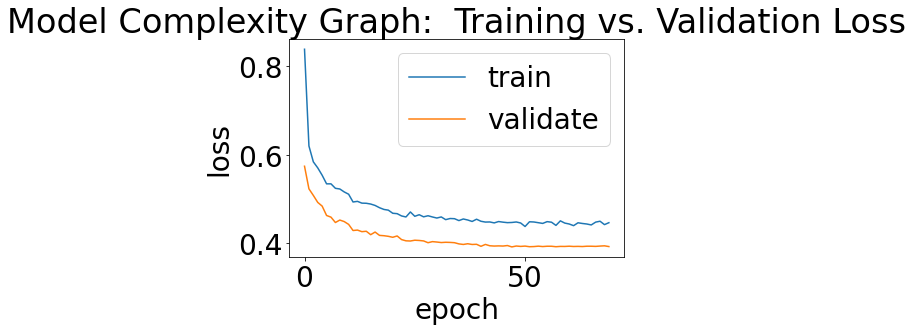

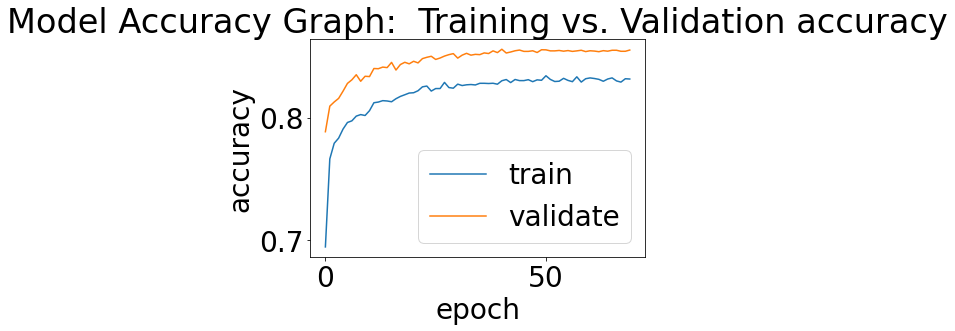

In [ ]:
history1_2 = np.load("/content/drive/MyDrive/all2/history1_2.npy",allow_pickle=True).item()
plt.figure(1)
plt.plot(history1_2['loss'])
plt.plot(history1_2['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1_2['accuracy'])
plt.plot(history1_2['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

Evaluate with test data

In [ ]:
score = modelall.evaluate(features_test, labels_test, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

625/625 [==============================] - 8s 12ms/step - loss: 0.3863 - accuracy: 0.8570
Test loss: 0.38629236817359924
Test accuracy: 0.8569999933242798


Confusion Matrix

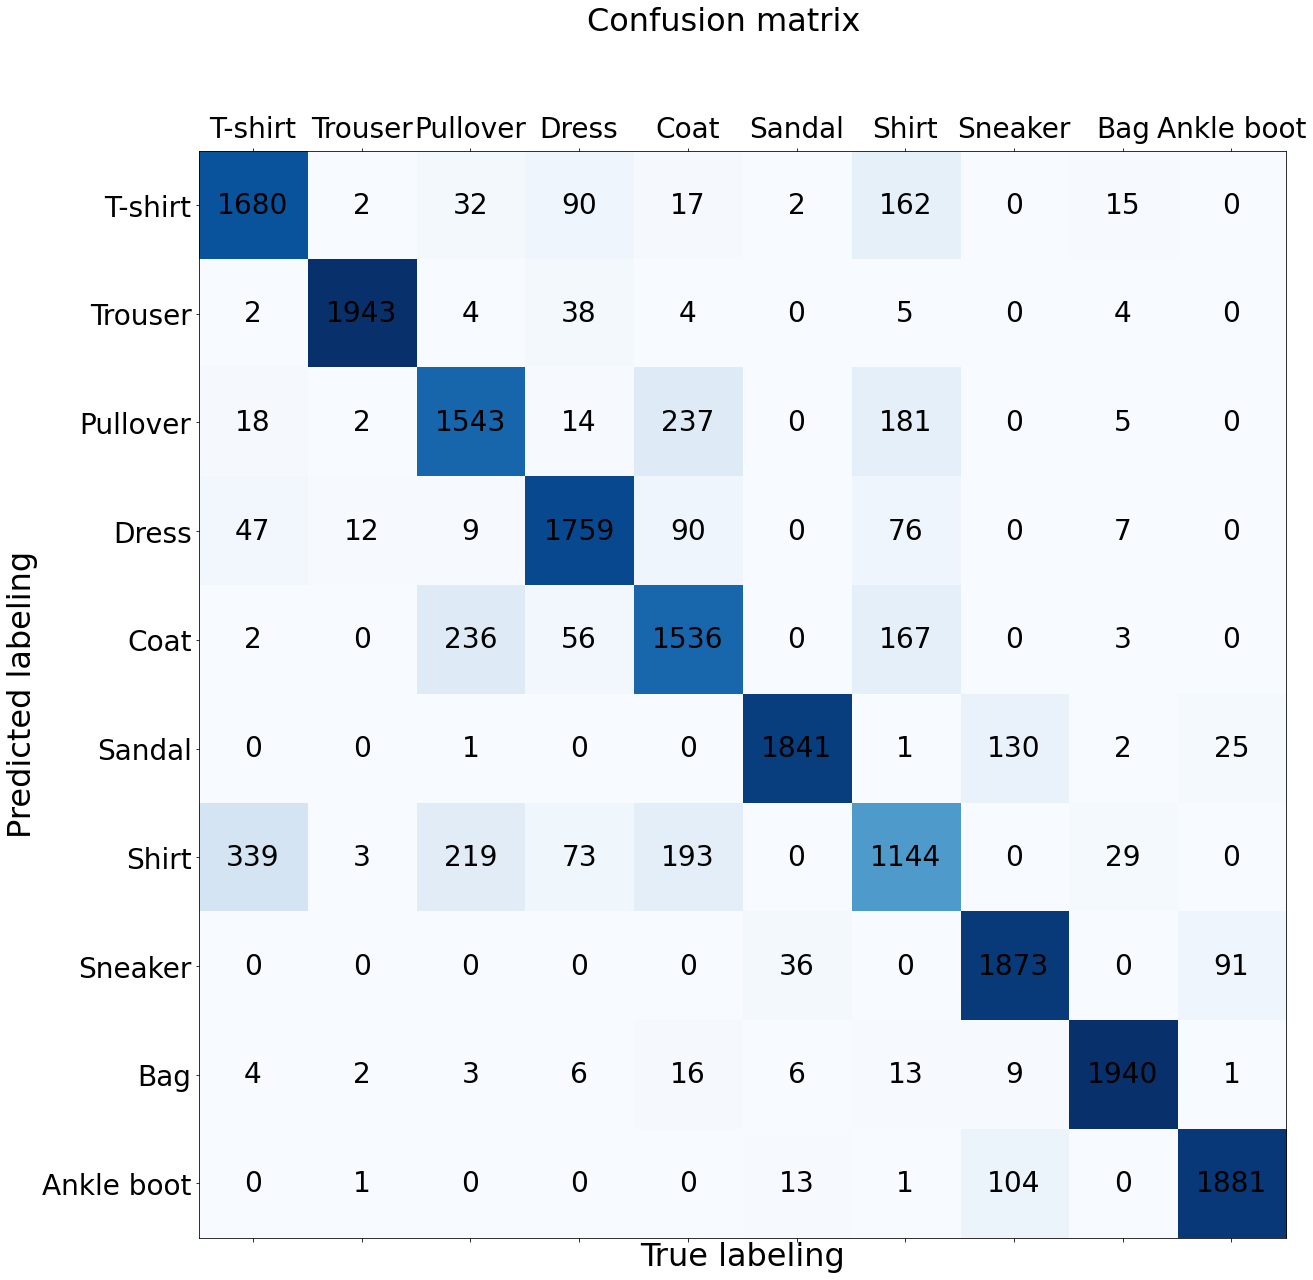

In [ ]:
from sklearn.metrics import confusion_matrix

y_vecs = modelall.predict(features_test)
y_pred = np.argmax(y_vecs, axis=1)
y_true = labels_test
cm = confusion_matrix(y_true, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

for i in range(10):
    for j in range(10):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(10))
plt.yticks(range(10))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

Τranfer learning from 5 last label model

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/o5")
for layer in model.layers[:20]:
    layer.trainable =False
from keras.models import Model

model= Model(inputs=model.input, outputs=model.layers[-3].output)


In [ ]:
x=model.output
x = Dense(10)(x)
x = Activation('softmax')(x)
inp = model.input
modelall2 =  Model(inputs = inp, outputs =x)
modelall2.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0  

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop
import os 

# optimizer = RMSprop(lr=0.0001, rho=0.95, epsilon=1e-08, decay=0.0)
# epochs = 1
Learning_rate = 0.001
#decay= 5 * Learning_rate / epochs
optimizer = Adam(lr=Learning_rate)
#optimizer = Adam(lr=Learning_rate, decay= 3 * Learning_rate / epochs)
# optimizer = RMSprop(lr=Learning_rate, rho=0.9, epsilon=1e-08, decay= 0)


modelall2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#               loss='sparse_categorical_crossentropy',

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000000000000000000000000000000000000000005)
# batch_size = 64
batch_size = 64
# Max value lr_min = 0.000125
checkpoint_path = "/content/drive/MyDrive/"
checkpoint_dir = os.path.dirname(checkpoint_path)
# checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

# model.load_weights("training_1/cp.ckpt") 
# # Optimizer
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# # Compiling the model
# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()

In [ ]:
# history1_2 = modelall2.fit(x=features_train, y = labels_train, epochs = 60, validation_split = 0.10, shuffle = True,
#                       batch_size = batch_size, verbose = 1, steps_per_epoch= u5_features_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
# model.save("content/drive/Mydrive/all/shaved_model.pb") # saving the model
np.save('/content/drive/MyDrive/all/history1_2!.npy',history1_2.history)

Visualization

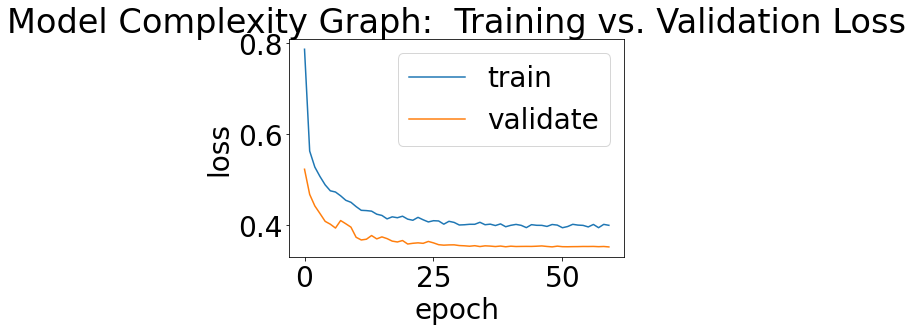

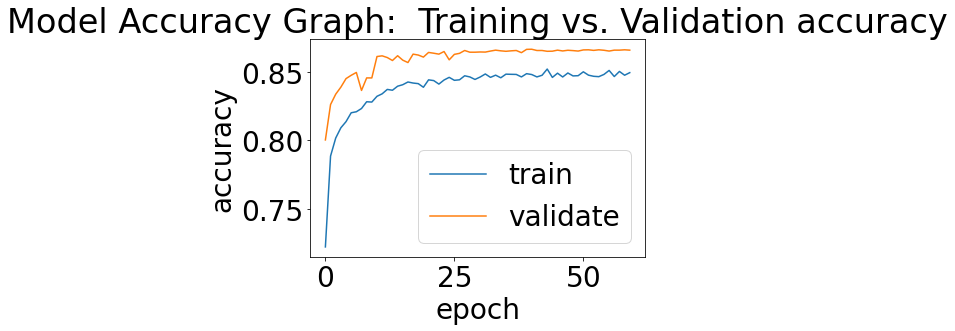

In [ ]:
history1_2 = np.load("/content/drive/MyDrive/all/history1_2!.npy",allow_pickle=True).item()
plt.figure(1)
plt.plot(history1_2['loss'])
plt.plot(history1_2['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1_2['accuracy'])
plt.plot(history1_2['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

TEST MODEL

In [ ]:
score = modelall2.evaluate(features_test, labels_test, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

625/625 [==============================] - 9s 15ms/step - loss: 0.3503 - accuracy: 0.8679
Test loss: 0.35028085112571716
Test accuracy: 0.8678500056266785


Confusion Matrix

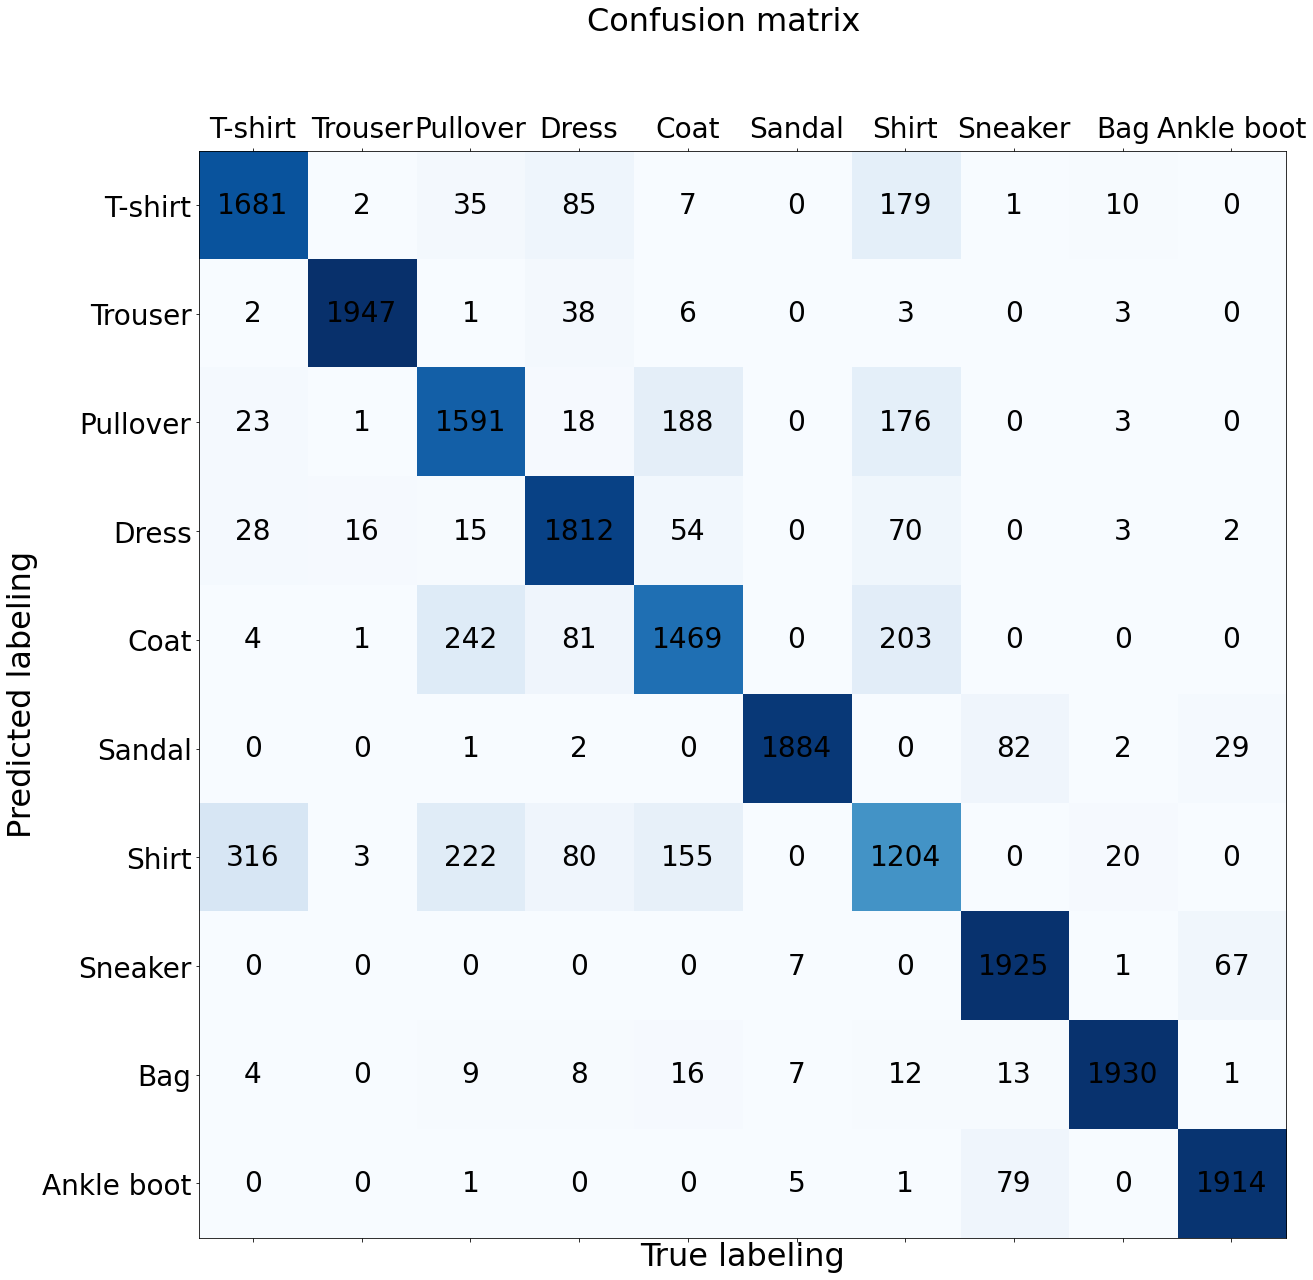

In [ ]:
from sklearn.metrics import confusion_matrix

y_vecs = modelall2.predict(features_test)
y_pred = np.argmax(y_vecs, axis=1)
y_true = labels_test
cm = confusion_matrix(y_true, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

for i in range(10):
    for j in range(10):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(10))
plt.yticks(range(10))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})